## Pen and Paper Part
### Problem 1 (20 pts)
Consider a model of the form: $y_i = \sum_j X_{ij} \beta_j + \epsilon_i$. Use an objective function that minimizes the sum of squared errors, $\sum_i \epsilon_i^2$ and derive a set of linear equations to optimize the parameters, $\beta_j$. 
 
You can stop when the solution is written in the form $\sum_j A_{ij} x_i = b_j$ (where A, x, and b are defined in terms of the original variables).

You will need the following derivative identities:

$\dfrac{\partial \vec{b'} \underline{\underline{X}}' \vec{y}}{\partial \vec{b}} = 
\underline{\underline{X}}' \vec{y}$

$\dfrac{\partial \vec{b'} \underline{\underline{X}}' \underline{\underline{X}} \vec{b}}{\partial \vec{b}} = 2 \underline{\underline{X}}' \underline{\underline{X}} \vec{b}$

Pleaes submit as a .pdf file named HW3-P1.pdf

## Coding Part

In this homework you will work with a synthetic spectra and fit regression models in order to find an "optimum complexity" model. You may recycle code from prior lectures in order to achieve this, or use an alternative strategy of your preference.

The dataset below is contained in the file `HW3_data.csv`. This data is similar to the data that might be obtained from a spectrometer, and in this case you can assume that the peaks are Gaussian.

<center>
<img src="data.png" width="600">
</center>

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('HW3_data.csv')

data.tail()
X = np.vstack((data['0'],np.array([1]*1000))).T
x= data['0']
y = data['1']

### Problem 2  (15 pts)
Write a function to extract Legendre polynomials and Gaussian kernel (with default $\sigma = 50$) features with a standard deviation of 100. Use it to plot first 4 features as a function of the input.


In [ ]:
from numpy.polynomial.legendre import legval

def plot_features(x,x_features):
    # Complete Code

def make_features(x, N, functionType):
    # Complete Code

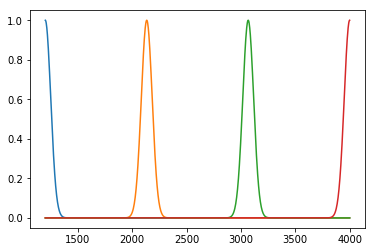

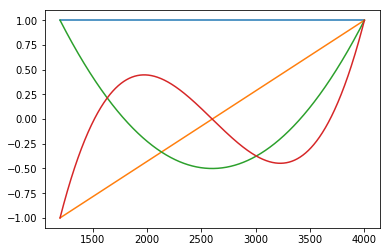

In [5]:
plot_features(x,make_features(x, 4, "gaussian"))
plot_features(x,make_features(x, 4, "legendre"))

### Problem 3  (20 pts)
#### a)
Write functions that:

* Generates features (using the function in problem 2)
* Uses Ridge regression with k-fold cross-validation and L2 regularization (you may use the `scikit-learn` implementations)
* Plots the average prediction mean-absolute-error (MAE) v.s. the regularization strength (in log-log scale)
* Plots the MAE of model with the best prediction MAE on the same graph

The sample output and the structure of the functions are given below.

Please shuffle the data before splitting into batches (for k-fold cross-validation).

* Hint: look into sklearn.model_selection.KFold and sklearn.linear_model.Ridge


In [17]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge


def plot_kfold_comparison(X,y,k,alphas):
    # Complete Code

def p3_kfold_compare(x,y,functionType,N,k,alphas):
    x_features = make_features(x, N, functionType)
    plot_kfold_comparison(x_features, y, k, alphas)   
    return

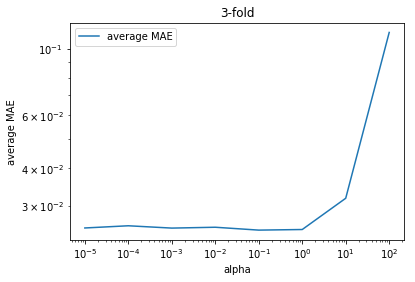

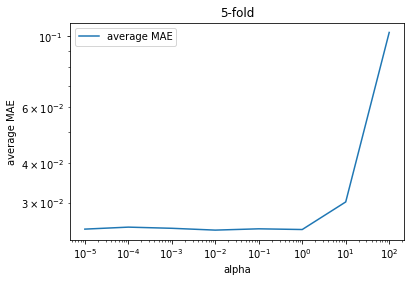

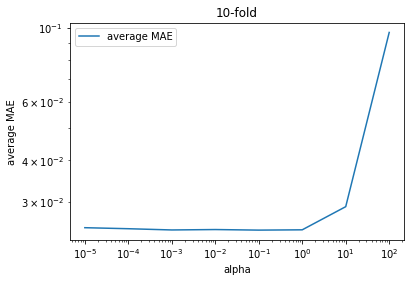

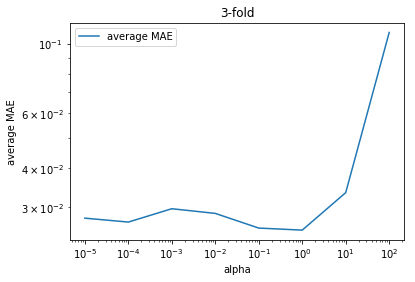

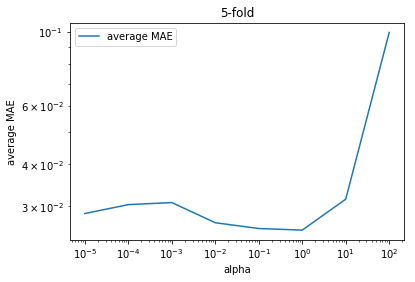

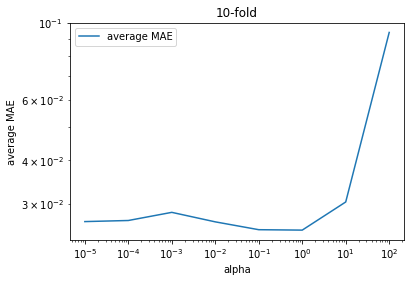

In [18]:
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]
p3_kfold_compare(x,y,"gaussian",80,3,alphas)
p3_kfold_compare(x,y,"gaussian",80,5,alphas)
p3_kfold_compare(x,y,"gaussian",80,10,alphas)

p3_kfold_compare(x,y,"legendre",80,3,alphas)
p3_kfold_compare(x,y,"legendre",80,5,alphas)
p3_kfold_compare(x,y,"legendre",80,10,alphas)

#### b)
Write functions that make scatter plots of $(x, y_{predict})$ of models with 5-fold cross validation and 80 legendre basis, compare with $(x, y)$ of the original data.

plot for alpha = 1e-4, 1e0 and 1e2

* $y_{predict}$ is the average of the predicted y with the 5 models

In [40]:
def p3_kfold_scatter(x,y,functionType,N,k,alpha):
    # Complete Code

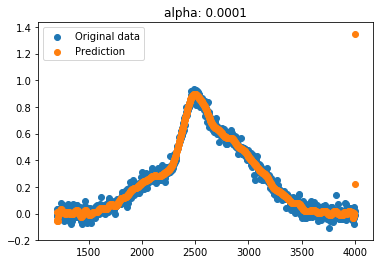

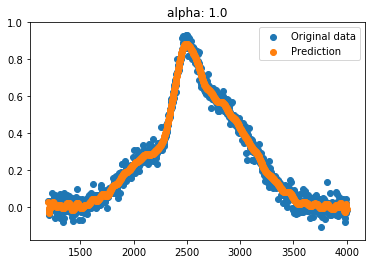

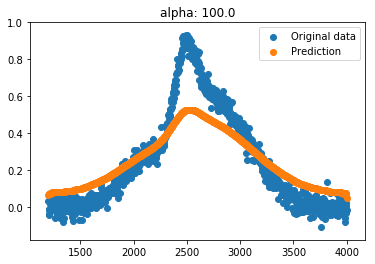

In [41]:
p3_kfold_scatter(x,y,"legendre",80,5,1e-4)
p3_kfold_scatter(x,y,"legendre",80,5,1e0)
p3_kfold_scatter(x,y,"legendre",80,5,1e2)

### Problem 4


In this exercise, you will write a general function that fits data with an arbitrary number of Gaussian functions. The magnitude ($\beta$), mean ($\mu$) and standard deviation ($\sigma$) of the Gaussian functions will be optimized non-linearly using scipy minimize function.

Please take a look at the sample output from part (a) to get an idea of what we are trying to achieve

some naming conventions:
* gaussian: list of tuples, that defines the gaussian functions
  
  [($\beta_1$, $\mu_1$, $\sigma_1$), ($\beta_2$, $\mu_2$, $\sigma_2$)...]
  

* guess: list of variables that need to be optimized
  
  [$\beta_1$, $\mu_1$, $\sigma_1$, $\beta_2$, $\mu_2$, $\sigma_2$...]


Some useful functions for plotting results:

In [6]:
import scipy

def guess_to_gaussians(guess):
    result = []
    for i in range(int(len(guess)/3)):
        result.append((guess[3*i], guess[3*i+1], guess[3*i+2]))
    return result

def plot_result(guess,x,y):
    gaussians = guess_to_gaussians(guess)
    y_predict = sum_features(get_gaussian_features(x, gaussians))
    fig, ax = plt.subplots()
    ax.scatter(x,y, color='g') #<- plot the original data
    ax.scatter(x,y_predict,color='r')
    plt.show()
    return

def plot_gaussians(guess):
    gaussians = guess_to_gaussians(guess)
    x = np.linspace(1200, 4000,10000)
    fig,ax = plt.subplots()
    for gaussian in gaussians:
        a = gaussian[0]
        miu = gaussian[1]
        sigma = gaussian[2]
        ax.plot(x,a * np.exp(-((x - miu)**2/(2*sigma**2))))
    plt.show()
    return

def dislay_result(guess,x,y):
    gaussians = guess_to_gaussians(guess)
    y_predict = sum_features(get_gaussian_features(x, gaussians))
    print("parameters of the gaussians")
    for gaussian in gaussians:
        print("a: {} \t mu: {} \t sigma: {}".format(gaussian[0], gaussian[1], gaussian[2]))
    
    print("mean square error: {}".format(np.mean(np.square(y_predict - y))))
    
    print("plot of result")
    plot_result(guess,x,y)
    
    print("plot of gaussians")
    plot_gaussians(guess)
    return



### a) Complete the function  (15 pts)

#### i) complete the function below that prepares gaussian features based on parameters of gaussians ("gaussians" variable), and sum up the gaussian features

In [7]:
def get_gaussian_features(x, gaussians):
    # x is a 1D vector
    # Complete code

def sum_features(features):
    # Complete code

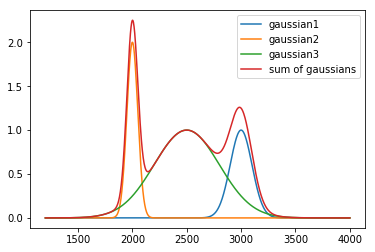

In [8]:
gaussians_test = [(1.0, 3000.0, 100.0),(2.0, 2000.0, 50.0),(1.0, 2500.0, 300.0)]

x_features = get_gaussian_features(x, gaussians_test)

fig,ax = plt.subplots()
ax.plot(x,x_features[0], label = "gaussian1")
ax.plot(x,x_features[1], label = "gaussian2")
ax.plot(x,x_features[2], label = "gaussian3")
ax.plot(x,sum_features(x_features), label = "sum of gaussians")
plt.legend()
plt.show()

#### ii) Complete the function below that prepares the inital guesses

Although might not be the best choice, we use the scheme below for initial guess:
a = 1.0 for all
sigma = 1.0 for all
miu: evenly spaced within the range of x

In [9]:
def prepare_initial_guess(x,num_gaussian):
    # num_gaussian: number of gaussian functions
    # Complete code

parameters of the gaussians
a: 1.0 	 mu: 1666.6666666666667 	 sigma: 100.0
a: 1.0 	 mu: 2133.3333333333335 	 sigma: 100.0
a: 1.0 	 mu: 2600.0 	 sigma: 100.0
a: 1.0 	 mu: 3066.666666666667 	 sigma: 100.0
a: 1.0 	 mu: 3533.3333333333335 	 sigma: 100.0
mean square error: 0.18298812385041824
plot of result


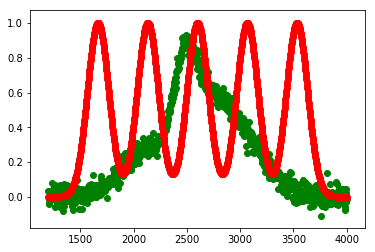

plot of gaussians


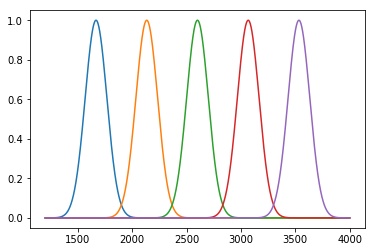

In [10]:
initial_guess_test = prepare_initial_guess(x,5)
dislay_result(initial_guess_test, x, y)

#### iii) Complete the `least_square_fit function` below that defines the objective function for optimization and the `fit_with_gaussians` that is the main function

Please use mean square error as the error metric.

For optimization, please use `Nelder-Mead` method, and set the maximum number of iteration to 50000


In [11]:
def least_square_fit(guess,x,y):
    # Complete code

def fit_with_gaussians(x,y,num_gaussian, display = True):
    # num_gaussian: number of gaussian functions
    # display: whether to print detailed result
    
    # Complete code

initial guess
parameters of the gaussians
a: 1.0 	 mu: 1760.0 	 sigma: 100.0
a: 1.0 	 mu: 2320.0 	 sigma: 100.0
a: 1.0 	 mu: 2880.0 	 sigma: 100.0
a: 1.0 	 mu: 3440.0 	 sigma: 100.0
mean square error: 0.17222171175321793
plot of result


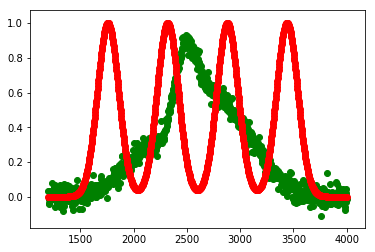

plot of gaussians


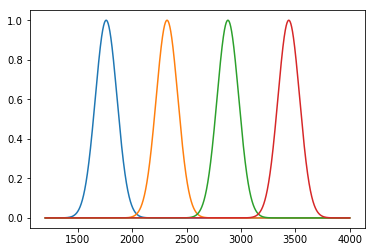



optimization result
parameters of the gaussians
a: 0.16529089910438355 	 mu: 2021.3378569683755 	 sigma: 193.3047861972542
a: 0.41670489788222737 	 mu: 2475.697823532989 	 sigma: 92.45402090075498
a: 0.061076885759542635 	 mu: 2615.9128823355395 	 sigma: 58.98473885189442
a: 0.5863442101721921 	 mu: 2727.3923797212187 	 sigma: 348.7616377681555
mean square error: 0.0009734928009791869
plot of result


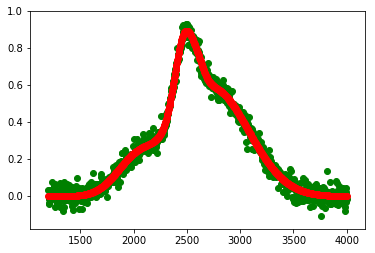

plot of gaussians


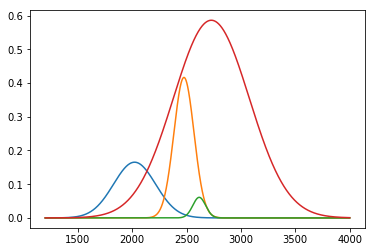

 final_simplex: (array([[1.65290899e-01, 2.02133786e+03, 1.93304786e+02, 4.16704898e-01,
        2.47569782e+03, 9.24540209e+01, 6.10768858e-02, 2.61591288e+03,
        5.89847389e+01, 5.86344210e-01, 2.72739238e+03, 3.48761638e+02],
       [1.65290855e-01, 2.02133780e+03, 1.93304755e+02, 4.16704800e-01,
        2.47569781e+03, 9.24540106e+01, 6.10769315e-02, 2.61591283e+03,
        5.89847637e+01, 5.86344236e-01, 2.72739233e+03, 3.48761657e+02],
       [1.65290877e-01, 2.02133782e+03, 1.93304768e+02, 4.16704813e-01,
        2.47569780e+03, 9.24540124e+01, 6.10769744e-02, 2.61591281e+03,
        5.89847551e+01, 5.86344227e-01, 2.72739235e+03, 3.48761649e+02],
       [1.65290929e-01, 2.02133787e+03, 1.93304775e+02, 4.16704871e-01,
        2.47569780e+03, 9.24540183e+01, 6.10769596e-02, 2.61591284e+03,
        5.89847582e+01, 5.86344214e-01, 2.72739239e+03, 3.48761621e+02],
       [1.65290908e-01, 2.02133786e+03, 1.93304772e+02, 4.16704894e-01,
        2.47569783e+03, 9.24540357e+01, 6.1

In [12]:
fit_with_gaussians(x,y,4)

### b) Assess error for 1 - 6 evenly spaced peaks as initial guesses(15 pts)

1 gaussians, mse: 0.004075235574786143
2 gaussians, mse: 0.0023820703069313354
3 gaussians, mse: 0.004075154474052875
4 gaussians, mse: 0.0009734928009791869
5 gaussians, mse: 0.0009954406138225015
6 gaussians, mse: 0.0009651231652824637


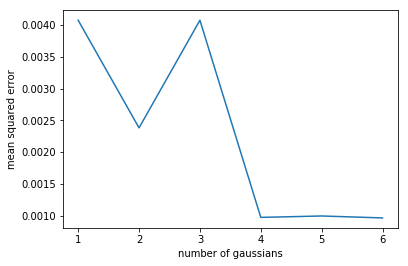

### c) Objective function modification (15 pts)
Please modify the objective function so that it penalize peaks with small area or negative magnitude, by adding the following penalty to the objective function for each gaussian peak:
$penalty = 10000 * exp( - area) = 10000 * exp( - \beta * \sigma * \sqrt(2*\pi)) $

Please also modify your main function so that it uses the new objective function

Compare the two objective functions by fitting the data with 5 gaussian peaks

In [15]:
import math

    
def least_square_fit_2(guess,x,y):
    # Complete code
    

def fit_with_gaussians_2(x,y,num_gaussian, display = True):
    # num_gaussian: number of gaussian functions
    # display: whether to print detailed result
    
    # Complete code

initial guess
parameters of the gaussians
a: 1.0 	 mu: 1666.6666666666667 	 sigma: 100.0
a: 1.0 	 mu: 2133.3333333333335 	 sigma: 100.0
a: 1.0 	 mu: 2600.0 	 sigma: 100.0
a: 1.0 	 mu: 3066.666666666667 	 sigma: 100.0
a: 1.0 	 mu: 3533.3333333333335 	 sigma: 100.0
mean square error: 0.18298812385041824
plot of result


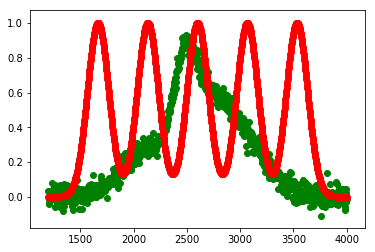

plot of gaussians


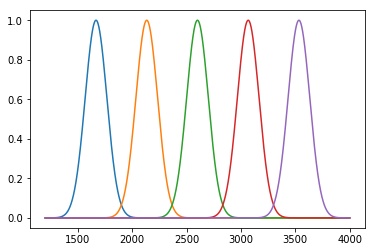



optimization result
parameters of the gaussians
a: 0.5051250265136555 	 mu: 2472.8105833065883 	 sigma: 100.68664012928068
a: 0.4889131584485348 	 mu: 2674.929718211193 	 sigma: 171.94049206052665
a: 0.3731700381896971 	 mu: 3046.0069382865927 	 sigma: -208.9755255861378
a: 0.279524687229456 	 mu: 2154.426509272187 	 sigma: 249.1268810125845
a: -0.06358322814659675 	 mu: 3157.268912260648 	 sigma: 83.00027760579056
mean square error: 0.0009954406138225015
plot of result


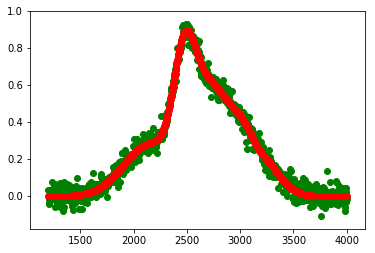

plot of gaussians


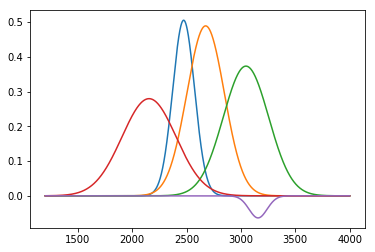

 final_simplex: (array([[ 5.05125027e-01,  2.47281058e+03,  1.00686640e+02,
         4.88913158e-01,  2.67492972e+03,  1.71940492e+02,
         3.73170038e-01,  3.04600694e+03, -2.08975526e+02,
         2.79524687e-01,  2.15442651e+03,  2.49126881e+02,
        -6.35832281e-02,  3.15726891e+03,  8.30002776e+01],
       [ 5.05125076e-01,  2.47281059e+03,  1.00686633e+02,
         4.88913115e-01,  2.67492976e+03,  1.71940482e+02,
         3.73170003e-01,  3.04600692e+03, -2.08975521e+02,
         2.79524691e-01,  2.15442656e+03,  2.49126930e+02,
        -6.35831717e-02,  3.15726885e+03,  8.30002775e+01],
       [ 5.05125039e-01,  2.47281059e+03,  1.00686625e+02,
         4.88913209e-01,  2.67492977e+03,  1.71940489e+02,
         3.73169973e-01,  3.04600697e+03, -2.08975521e+02,
         2.79524731e-01,  2.15442659e+03,  2.49126893e+02,
        -6.35831855e-02,  3.15726901e+03,  8.30002774e+01],
       [ 5.05125020e-01,  2.47281058e+03,  1.00686624e+02,
         4.88913264e-01,  2.67492973

In [16]:
fit_with_gaussians(x,y,5)

initial guess
parameters of the gaussians
a: 1.0 	 mu: 1666.6666666666667 	 sigma: 100.0
a: 1.0 	 mu: 2133.3333333333335 	 sigma: 100.0
a: 1.0 	 mu: 2600.0 	 sigma: 100.0
a: 1.0 	 mu: 3066.666666666667 	 sigma: 100.0
a: 1.0 	 mu: 3533.3333333333335 	 sigma: 100.0
mean square error: 0.18298812385041824
plot of result


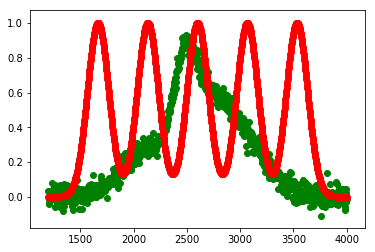

plot of gaussians


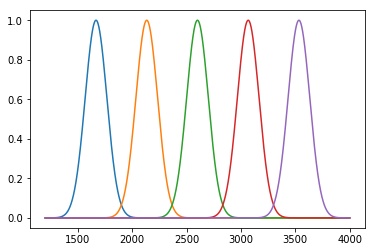



optimization result
parameters of the gaussians
a: 0.3133868018112819 	 mu: 2829.051629588478 	 sigma: 176.8931646134302
a: 0.11663777029468358 	 mu: 3102.788558942149 	 sigma: 79.94170768464383
a: 0.4689477341163949 	 mu: 2496.9243704453074 	 sigma: 100.13504061418845
a: 0.37984147284550784 	 mu: 2465.3347395374276 	 sigma: 416.0262978352648
a: 0.09392613361411895 	 mu: 3307.792005880622 	 sigma: 108.49759358010769
mean square error: 0.0011158302085112432
plot of result


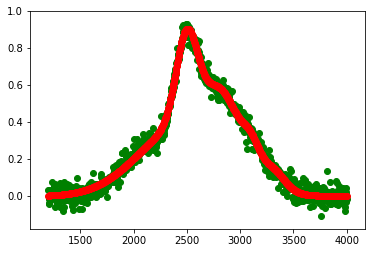

plot of gaussians


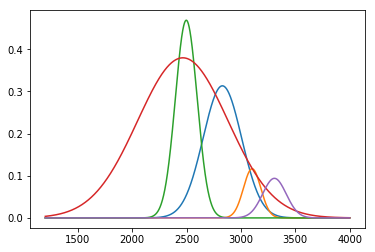

 final_simplex: (array([[3.13386802e-01, 2.82905163e+03, 1.76893165e+02, 1.16637770e-01,
        3.10278856e+03, 7.99417077e+01, 4.68947734e-01, 2.49692437e+03,
        1.00135041e+02, 3.79841473e-01, 2.46533474e+03, 4.16026298e+02,
        9.39261336e-02, 3.30779201e+03, 1.08497594e+02],
       [3.13386809e-01, 2.82905159e+03, 1.76893167e+02, 1.16637802e-01,
        3.10278850e+03, 7.99417101e+01, 4.68947729e-01, 2.49692437e+03,
        1.00135037e+02, 3.79841458e-01, 2.46533473e+03, 4.16026304e+02,
        9.39261398e-02, 3.30779195e+03, 1.08497596e+02],
       [3.13386835e-01, 2.82905160e+03, 1.76893158e+02, 1.16637816e-01,
        3.10278853e+03, 7.99417134e+01, 4.68947716e-01, 2.49692437e+03,
        1.00135038e+02, 3.79841458e-01, 2.46533470e+03, 4.16026285e+02,
        9.39261704e-02, 3.30779200e+03, 1.08497589e+02],
       [3.13386871e-01, 2.82905167e+03, 1.76893149e+02, 1.16637805e-01,
        3.10278860e+03, 7.99417101e+01, 4.68947794e-01, 2.49692439e+03,
        1.00135046e+

In [17]:
fit_with_gaussians_2(x,y,5)

#### Assess error associated with the new objective function for 1 - 6 evenly spaced peaks as initial guesses

1 gaussians, mse: 0.004075235574786143
2 gaussians, mse: 0.0014379332493966344
3 gaussians, mse: 0.0013239105564980585
4 gaussians, mse: 0.0009771234292497999
5 gaussians, mse: 0.0011158302085112432
6 gaussians, mse: 0.000968387318075886


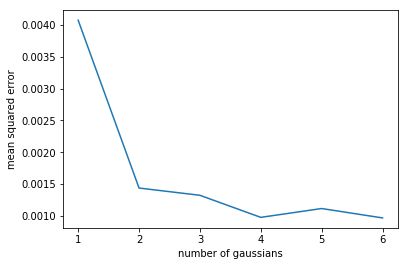